In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#!pip install pycaret
# from imblearn.over_sampling import RandomOverSampler
from pycaret.classification import *
#from pycaret.regression import *

In [206]:
df=pd.read_csv("data/2011.csv")
df.head()

,Unnamed: 0,origIntRate,origUPB,origLTV,origDebtIncRatio,worstCreditScore,zeroBalCode,mSA
0,77166,4.750,112000,80,36,697,0,28100
1,77167,4.600,101000,60,32,704,0,20740
2,77168,5.375,123000,70,30,681,0,16980
3,77169,4.375,185000,79,31,804,0,37980
4,77170,4.375,176000,78,30,712,0,48620


In [207]:
df.drop('Unnamed: 0', 1, inplace = True)

In [208]:
df.shape

(14111, 7)

In [209]:
df.head()

,origIntRate,origUPB,origLTV,origDebtIncRatio,worstCreditScore,zeroBalCode,mSA
0,4.750,112000,80,36,697,0,28100
1,4.600,101000,60,32,704,0,20740
2,5.375,123000,70,30,681,0,16980
3,4.375,185000,79,31,804,0,37980
4,4.375,176000,78,30,712,0,48620


# Pycaret - Setup with categorical definition

### Use complex setup 

In [210]:
model_setup = setup(
    df
    , target = 'zeroBalCode' # PyCaret will list this as "Label"
    , normalize = True
    , numeric_features = [
            'origIntRate'
            , 'origUPB'
            , 'origLTV'
            , 'origDebtIncRatio'
            , 'worstCreditScore'
        ]
     , categorical_features = [
            'mSA'
        ]   
)


 
Setup Succesfully Completed!


,Description,Value
0,session_id,3806
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(14111, 7)"
4,Missing Values,False
5,Numeric Features,5
6,Categorical Features,1
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


## Compare Models with no blacklist exclusions

In [211]:
model_results=compare_models(fold = 2, turbo = True)
model_results

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Extreme Gradient Boosting,0.925700,0.819500,0.024500,0.432700,0.045900,0.039800
1,Logistic Regression,0.925600,0.823600,0.025800,0.572200,0.048900,0.042200
2,CatBoost Classifier,0.923200,0.818100,0.051600,0.373400,0.089600,0.073600
3,Gradient Boosting Classifier,0.923000,0.816300,0.046200,0.362900,0.081400,0.065900
4,Ridge Classifier,0.921400,0.000000,0.020400,0.163600,0.036000,0.023700
5,SVM - Linear Kernel,0.921100,0.000000,0.020400,0.173500,0.036200,0.023300
6,Random Forest Classifier,0.921100,0.699000,0.032600,0.265500,0.058100,0.042400
7,Light Gradient Boosting Machine,0.921100,0.803000,0.059800,0.337100,0.100100,0.079900
8,K Neighbors Classifier,0.920700,0.669100,0.063900,0.333400,0.107200,0.085300
9,Ada Boost Classifier,0.920100,0.806700,0.091000,0.358100,0.145100,0.118500


## Create models 

#### Extra Trees

In [212]:
lr = create_model('lr', fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9302,0.8023,0.0685,0.8333,0.1266,0.1167
1,0.9200,0.7814,0.0541,0.3077,0.0920,0.0712
2,0.9261,0.8456,0.0270,0.6667,0.0519,0.0464
3,0.9241,0.8303,0.0135,0.3333,0.0260,0.0203
4,0.9221,0.8190,0.0135,0.2000,0.0253,0.0160
5,0.9291,0.7957,0.0676,0.8333,0.1250,0.1151
6,0.9271,0.8436,0.0541,0.6667,0.1000,0.0898
7,0.9230,0.8557,0.0137,0.2000,0.0256,0.0163
8,0.9301,0.8923,0.0548,1.0000,0.1039,0.0970
9,0.9291,0.8248,0.0411,1.0000,0.0789,0.0735


## Evaluate Models

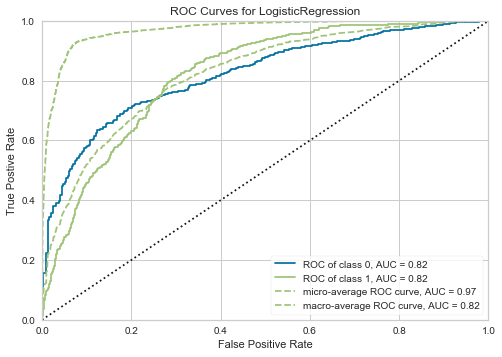

In [213]:
plot_model(lr)

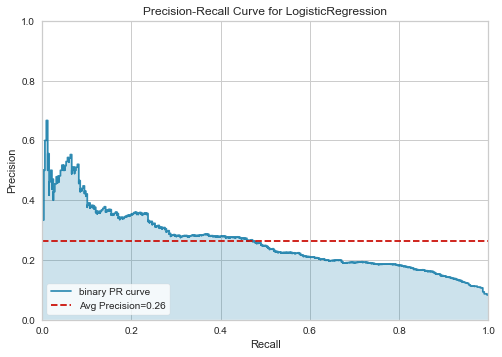

In [214]:
plot_model(lr, plot = 'pr')

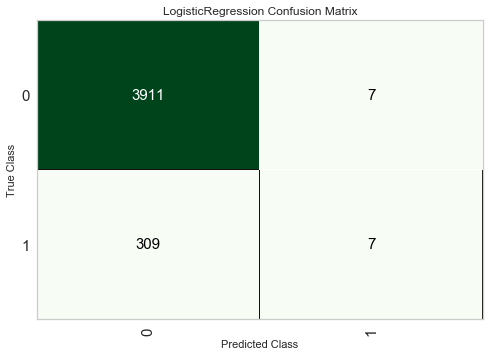

In [215]:
plot_model(lr, plot='confusion_matrix')

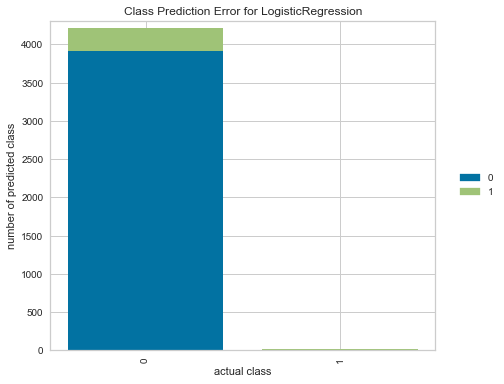

In [216]:
plot_model(lr, plot = 'error')

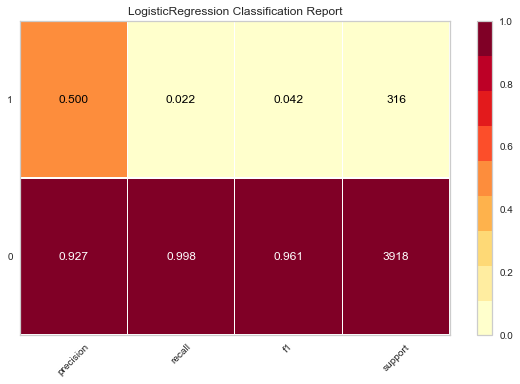

In [217]:
plot_model(lr, plot = 'class_report')

## Finalize the Model

In [218]:
final_lgbm = finalize_model(lightgbm)

# Predict models

In [219]:
df2 = pd.read_csv('data/2012.csv')
df2.head()

,Unnamed: 0,origIntRate,origUPB,origLTV,origDebtIncRatio,worstCreditScore,zeroBalCode,mSA
0,92142,4.125,591000,60,45,673,0,31080
1,92143,5.250,46000,80,25,691,0,44180
2,92146,4.375,439000,70,37,789,0,42660
3,92147,4.250,101000,75,41,686,0,0
4,92148,4.375,256000,80,37,723,0,35380


In [220]:
predictions = predict_model(lr_final, data = df2)
predictions

,Unnamed: 0,origIntRate,origUPB,origLTV,origDebtIncRatio,worstCreditScore,zeroBalCode,mSA,Label,Score
0,92142,4.125,591000,60,45,673,0,31080,0,0.0008
1,92143,5.250,46000,80,25,691,0,44180,0,0.1842
2,92146,4.375,439000,70,37,789,0,42660,0,0.0052
3,92147,4.250,101000,75,41,686,0,0,0,0.0896
4,92148,4.375,256000,80,37,723,0,35380,0,0.0372
...,...,...,...,...,...,...,...,...,...,...
18500,111331,3.375,232000,73,33,755,0,11460,0,0.0165
18501,111332,4.125,127000,67,34,653,0,40140,0,0.0340
18502,111333,3.875,102000,37,39,670,0,39580,0,0.0069
18503,111334,3.875,180000,75,39,661,0,14460,0,0.0372


In [223]:
predictions.to_csv('data/predict_results.csv')

In [224]:
save_model(lr, 'lr200527')

Transformation Pipeline and Model Succesfully Saved
